
# Q1: What is the distribution of each sensor reading?
    a. Draw a histogram for each sensor reading

**Purpose of the question**: understand the nature of the data


In [7]:
# !pip install lasio pandas missingno seaborn matplotlib numpy --quiet
import lasio
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [8]:
df = lasio.read("./Data/7_1-2 S.las").df()
df.reset_index(inplace=True)
rename_columns(df)
rename_lithology(df)
df.dropna(inplace=True)

In [9]:
Columns_to_drop = [
    My_Columns.DEPTH,
    My_Columns.CALIPER,
    My_Columns.BOREHOLE_SIZE,
    My_Columns.DENSITY_CORRECTION,
    My_Columns.RATE_OF_PENETRATION,
    My_Columns.AVERAGE_RATE_OF_PENETRATION,
    My_Columns.SPECTRA_GAMMA_RAY,
    My_Columns.WEIGHT_OF_DRILLING_MUD,
    My_Columns.DIFFERENTIAL_CALIPER,
    My_Columns.CONFIDENCE,
    My_Columns.FORMATION,
    My_Columns.WELL,
    My_Columns.GROUP,
    My_Columns.X_LOC,
    My_Columns.Y_LOC,
    My_Columns.Z_LOC,
]

for column in Columns_to_drop:
    if column in df.columns:
        df.drop(column, axis=1, inplace=True)


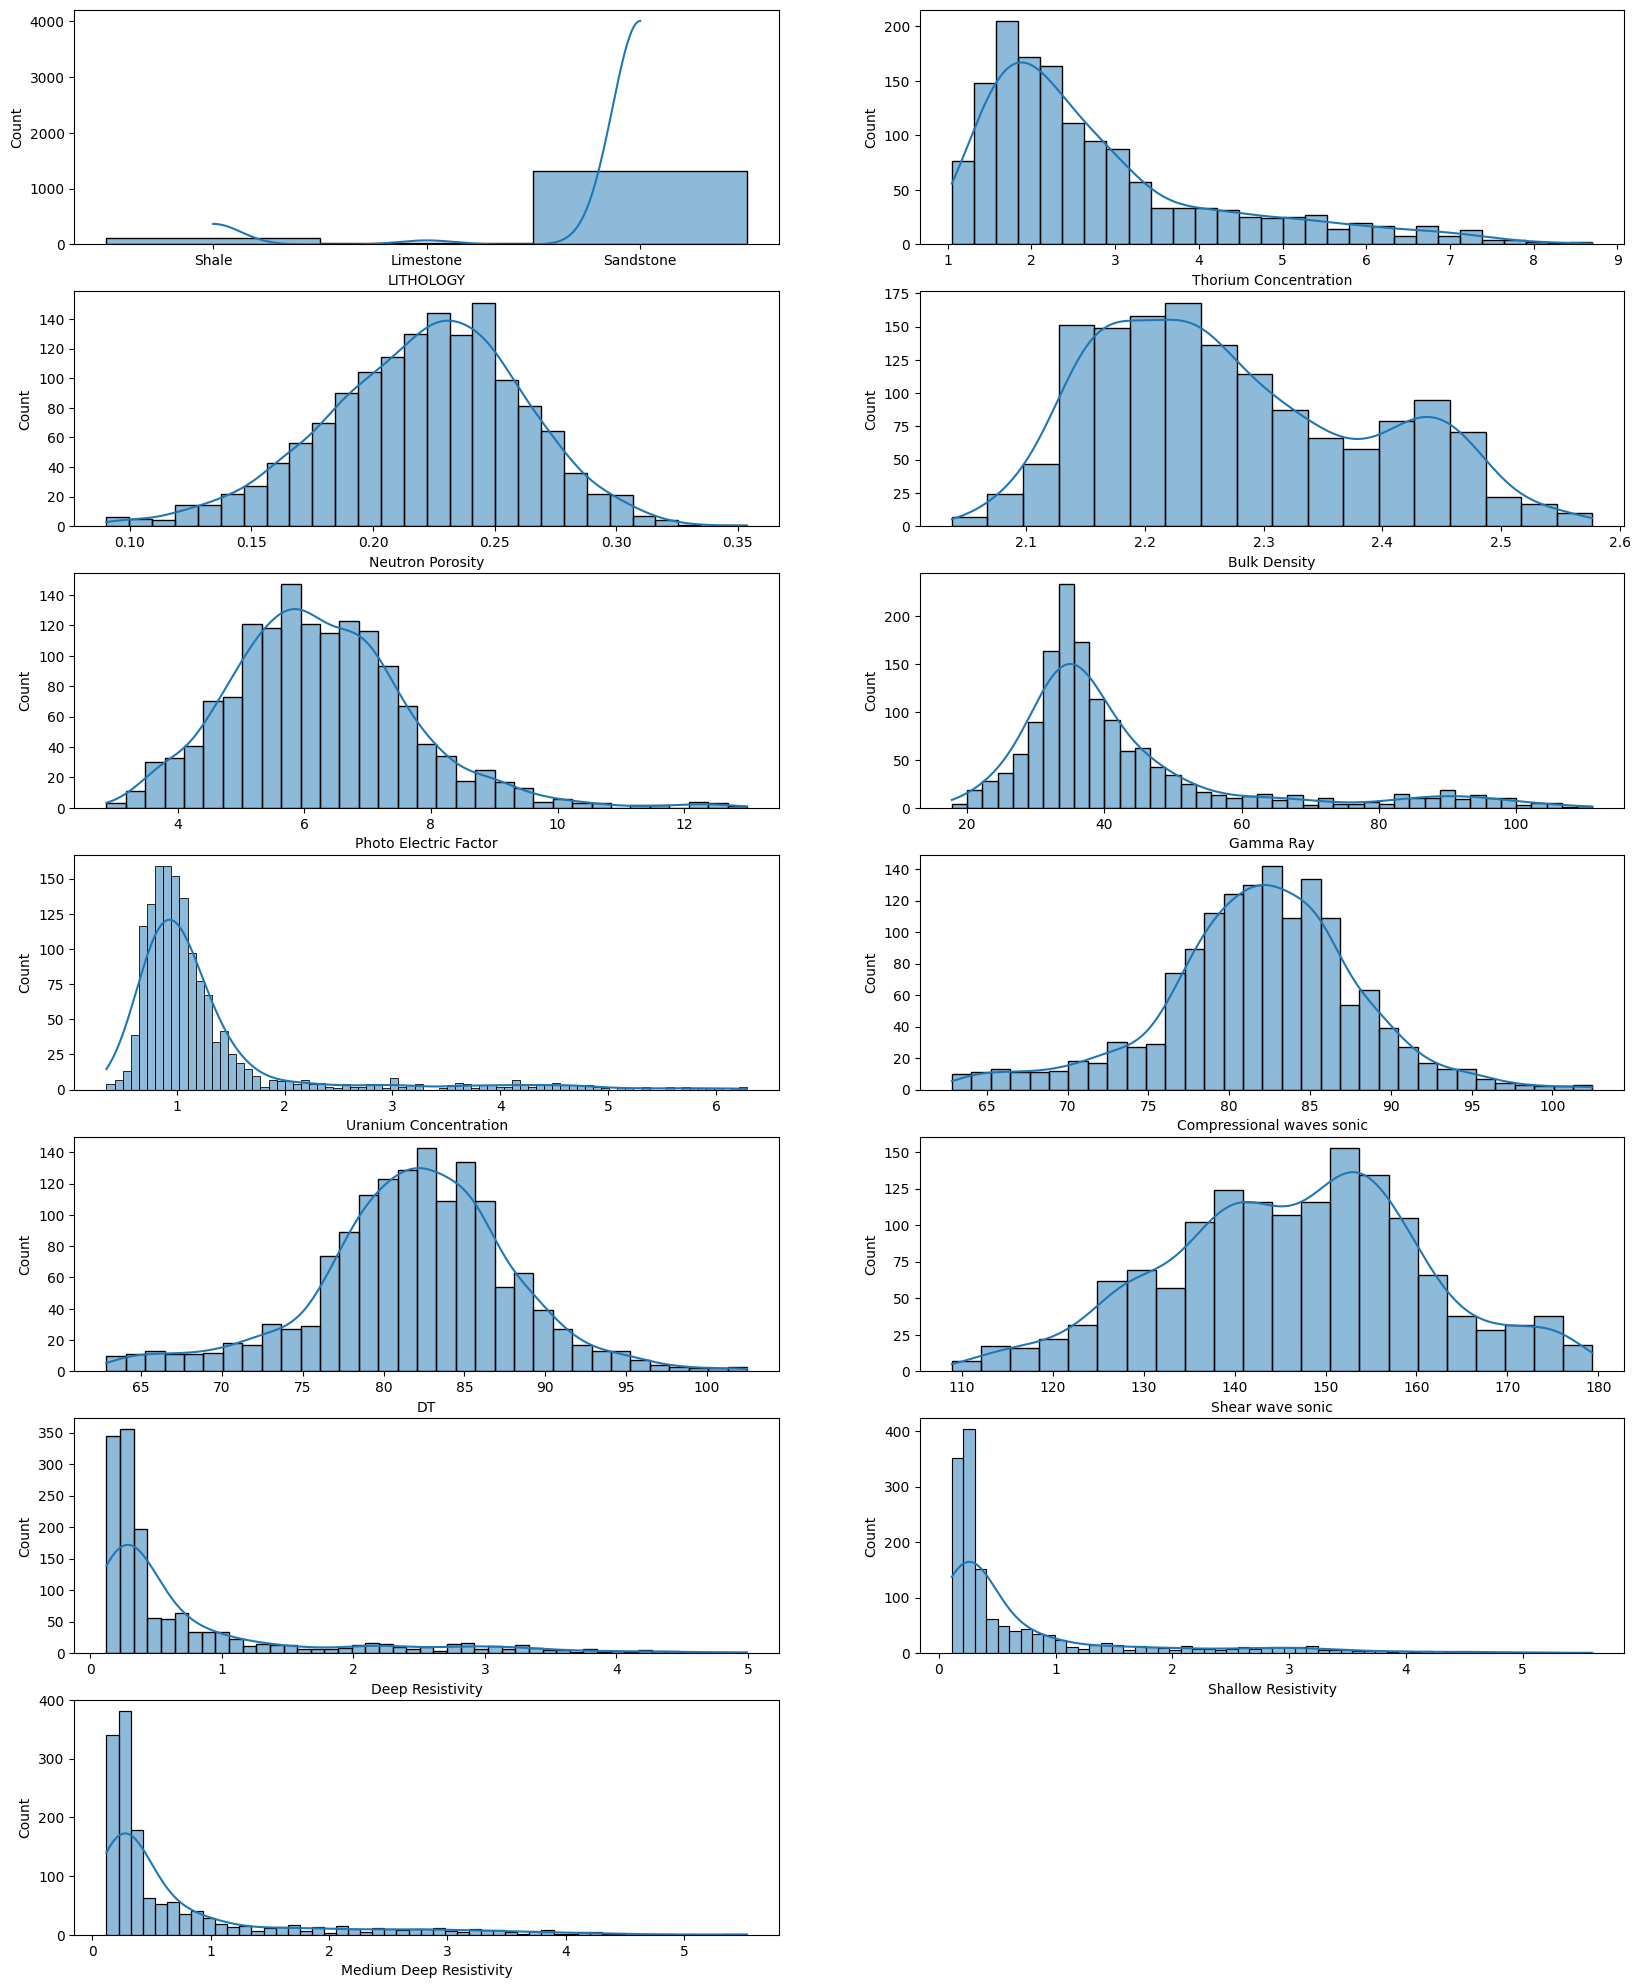

In [10]:
Tot = len(df.columns)
Cols = 2
Rows = Tot // Cols
if Tot % Cols != 0:
    Rows += 1
Position = range(1, Tot + 1)
fig = plt.figure(1, figsize=(20, 25))

for k in range(Tot):
    ax = fig.add_subplot(Rows, Cols, Position[k])
    sns.histplot(data=df, x=df.columns[k], kde=True)

    # save the subplot individually
    # plt.figure(figsize=(6, 4))
    # sns.histplot(data=df, x=df.columns[k], kde=True)
    # plt.savefig(f"./Distributions/{k}.png")

plt.show()


1. **Resistivity** always tends to 0 due to presence of salty water
2. **Self Potential** has a great variance depending on the lithology
3. **Gamma Rays** have high values only in shale which is explained by the presence of low frequency of shale